# Importing important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import curve_fit
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Functions

In [2]:
# Calculate statistics
def calculate_statistics(data):
    """
    Calculates various statistics for the dataset.
    
    Parameters:
        data (DataFrame): Input DataFrame.
        
    Returns:
        dict: Dictionary containing calculated statistics.
    """
    median_value = data.median(numeric_only=True)
    skewness = data.skew(numeric_only=True)
    kurtosis = data.kurt(numeric_only=True)
    
    statistics = {
        'Median': median_value,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Description': data.describe()
    }
    return statistics

# Display statistics
def display_statistics(statistics):
    """
    Displays the calculated statistics.
    
    Parameters:
        statistics (dict): Dictionary containing calculated statistics.
    """
    for stat_name, stat_values in statistics.items():
        print(f"----- {stat_name} -----")
        if stat_name == 'Description':
            print(stat_values)
        else:
            print(stat_values)
            print()

# Data visualization
def plot_scatter(data):
    """
    Plots a relational graph (scatter plot) of Age vs. Spending Score.
    
    Parameters:
        data (DataFrame): Input DataFrame.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Age'], data['Spending Score (1-100)'])
    plt.xlabel('Age')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Age vs. Spending Score')
    plt.tight_layout()
    plt.grid()
    plt.show()

def plot_bar(data):
    """
    Plots a categorical graph (count plot) of Genre with values inside the bars and different colors for each genre.
    
    Parameters:
        data (DataFrame): Input DataFrame.
    """
    plt.figure(figsize=(8, 6))
    
    # Define colors for each Genre
    colors = {'Male': 'blue', 'Female': 'pink'}
    
    sns.countplot(x='Genre', data=data, palette=colors.values())
    
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.title('Genre Count')
    
    # Add annotations to show count values inside the bars
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                           textcoords='offset points')
    
    # Create legend
    legend_labels = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
    plt.legend(legend_labels, colors.keys(), title='Genre', loc='upper left')
    
    plt.tight_layout()
    plt.show()


def plot_corr(data):
    """
    Plots a statistical graph (heatmap) of correlation.
    
    Parameters:
        data (DataFrame): Input DataFrame.
    """
    plt.figure(figsize=(8, 6))
    data_corr = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Encoded']]
    correlation = data_corr.corr()
    sns.heatmap(correlation, annot=True)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

#Clustering Functions
# Elbow Method for optimal number of clusters
def calculate_wcss(data, min_clusters, max_clusters):
    """
    Calculates Within Cluster Sum of Squares (WCSS) for different number of clusters.
    
    Parameters:
        data (DataFrame): Input data for clustering.
        min_clusters (int): Minimum number of clusters to consider.
        max_clusters (int): Maximum number of clusters to consider.
    
    Returns:
        list: List of WCSS values for each number of clusters.
    """
    wcss = []
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

def plot_elbow_method(min_clusters, max_clusters, wcss):
    """
    Plots the Elbow Method to find the optimal number of clusters.
    
    Parameters:
        min_clusters (int): Minimum number of clusters to consider.
        max_clusters (int): Maximum number of clusters to consider.
        wcss (list): List of Within Cluster Sum of Squares (WCSS) values for each number of clusters.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(min_clusters, max_clusters + 1), wcss, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xticks(range(min_clusters, max_clusters + 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def calculate_silhouette_score(data):
    """
    Calculates and prints the Silhouette Score for different numbers of clusters.
    
    Parameters:
        data (DataFrame): Input data for clustering.
    """
    X = data[['Age', 'Spending Score (1-100)']]
    silhouette_scores = []
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")
    
    best_score = max(silhouette_scores)
    best_n_clusters = silhouette_scores.index(best_score) + 2
    print(f"The best silhouette score is {best_score} for n_clusters = {best_n_clusters}")


def kmeans_clustering(data, n_clusters):
    """
    Performs KMeans clustering on the data.
    
    Parameters:
        data (DataFrame): Input data for clustering.
        n_clusters (int): Number of clusters.
    
    Returns:
        DataFrame: Data with added 'Cluster' column.
        ndarray: Centroids of the clusters.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data[['Age', 'Spending Score (1-100)', 'Genre_Encoded']])
    data['Cluster'] = clusters.astype(str)
    centroids = kmeans.cluster_centers_
    return data, centroids

def plot_clusters(data, centroids):
    """
    Plots clusters with centroids.
    
    Parameters:
        data (DataFrame): Input data with 'Cluster' column.
        centroids (ndarray): Centroids of the clusters.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=300, c='r', label='Centroids')
    plt.title('Clustering with Centroids')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Fitting Functions
def exponential(t, n0, g):
    """
    Calculates exponential function with scale factor n0 and growth rate g.
    """
    return n0 * np.exp(g * t)

def logistic(t, n0, g, t0):
    """
    Calculates the logistic function with scale factor n0, growth rate g, and t0.
    """
    return n0 / (1 + np.exp(-g * (t - t0)))

def prefit_plot(data):
    numeric_index = (data['year'] - data['year'].min()).values
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(co2_zim['year'], co2_zim['value'], marker='o', linestyle='-',label='Actual Data')
    plt.title('CO2 Levels with Exponential and Logistic Fits')
    plt.xlabel('Year')
    plt.ylabel('CO2 Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def fitting(data):
    """
    Fits exponential and logistic functions to the data and plots the fits.
    
    Parameters:
        data (DataFrame): Input data for fitting.
    """
    numeric_index = (data['year'] - data['year'].min()).values    
    # Fit the exponential function
    p_exp, cov_exp = curve_fit(exponential, numeric_index, data['value'], p0=(1.2e12, 0.03))
    sigma_exp = np.sqrt(np.diag(cov_exp))
    data['Exponential Fit'] = exponential(numeric_index, *p_exp)
    
    # Fit the logistic function
    p_log, cov_log = curve_fit(logistic, numeric_index, data['value'], p0=(1.2e12, 0.03, 10))
    sigma_log = np.sqrt(np.diag(cov_log))
    data['Logistic Fit'] = logistic(numeric_index, *p_log)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data['year'], data['Exponential Fit'], label='Exponential Fit', linestyle='--')
    plt.plot(data['year'], data['Logistic Fit'], label='Logistic Fit', linestyle='--')
    plt.plot(co2_zim['year'], co2_zim['value'], marker='o', linestyle='-',label='Actual Data')
    plt.title('CO2 Levels with Exponential and Logistic Fits')
    plt.xlabel('Year')
    plt.ylabel('CO2 Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def predict_and_plot_co2_2030(data):
    """
    Predicts the CO2 value in 2030 using logistic fitting and plots the result.
    
    Parameters:
        data (DataFrame): Input data for fitting.
    """
    numeric_index = (data['year'] - data['year'].min()).values       
    # Fit the logistic function
    p_log, cov_log = curve_fit(logistic, numeric_index, data['value'], p0=(1.2e12, 0.03, 10))
    
    # Predict CO2 value in 2030
    co2_2030 = logistic(2030 - data['year'].min(), *p_log)
    
    # Calculate uncertainty
    sample_params = ss.multivariate_normal.rvs(mean=p_log, cov=cov_log, size=1000)
    co2_unc_2030 = np.std(logistic(2030 - data['year'].min(), *sample_params.T))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot the actual CO2 data
    plt.plot(data['year'], data['value'], marker='o', linestyle='-', label='Actual CO2 Data')
    
    # Plot the logistic fit
    time_predictions = np.arange(data['year'].min(), 2051, 1)
    co2_predictions = logistic(time_predictions - data['year'].min(), *p_log)
    plt.plot(time_predictions, co2_predictions, 'k-', label='Logistic Fit')
    
    # Plot the predicted CO2 value for 2030 with uncertainty
    plt.errorbar(2030, co2_2030, yerr=co2_unc_2030, fmt='o', color='red', label='Predicted CO2 in 2030')
    
    # Plot the uncertainty for the logistic fit
    co2_uncertainties = [np.std(logistic(future_time - data['year'].min(), *sample_params.T)) for future_time in time_predictions]
    plt.fill_between(time_predictions, co2_predictions - co2_uncertainties, co2_predictions + co2_uncertainties, 
                     color='gray', alpha=0.5, label='Uncertainty')
    
    # Plotting settings
    plt.title('CO2 Levels with Logistic Fit and Prediction for 2030')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (kt)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# Data Preparation and Data Exploration

In [3]:
# Load data
data = pd.read_csv('Mall_Customers.csv')

# Data cleaning
data.dropna()

data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Convert Genre to numerical using Label Encoding
label_encoder = LabelEncoder()
data['Genre_Encoded'] = label_encoder.fit_transform(data['Genre'])

In [5]:
# Statistics
statistics = calculate_statistics(data)
display_statistics(statistics)

----- Median -----
CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
Genre_Encoded               0.0
dtype: float64

----- Skewness -----
CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
Genre_Encoded             0.243578
dtype: float64

----- Kurtosis -----
CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
Genre_Encoded            -1.960375
dtype: float64

----- Description -----
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
count  200.000000  200.000000          200.000000              200.000000   
mean   100.500000   38.850000           60.560000               50.200000   
std     57.879185   13.969007           26.264721               25.823522   
min      1.000000   18.000000           15.000000

# Data Visualization

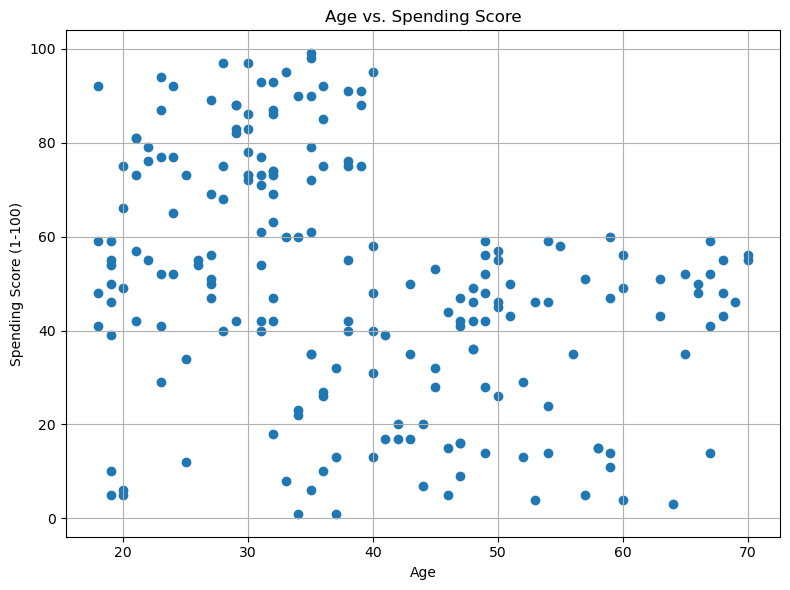

In [6]:
plot_scatter(data)


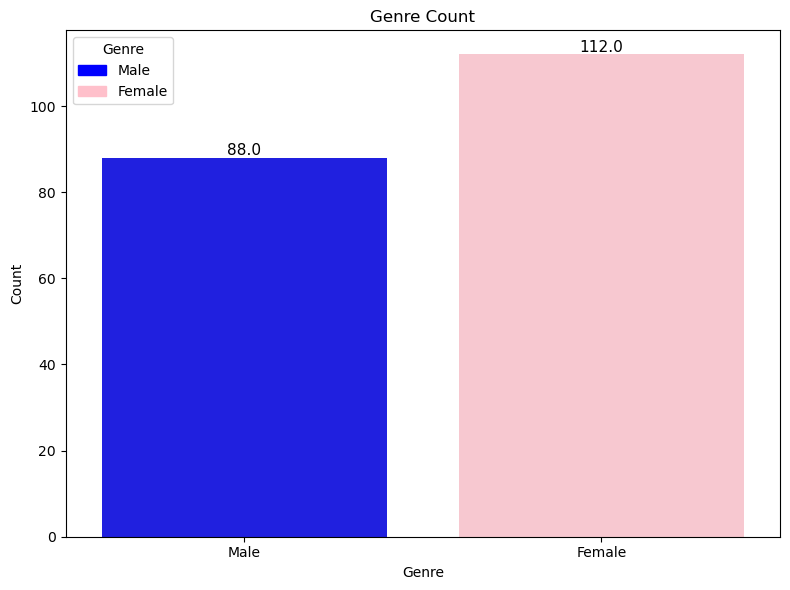

In [7]:
plot_bar(data)


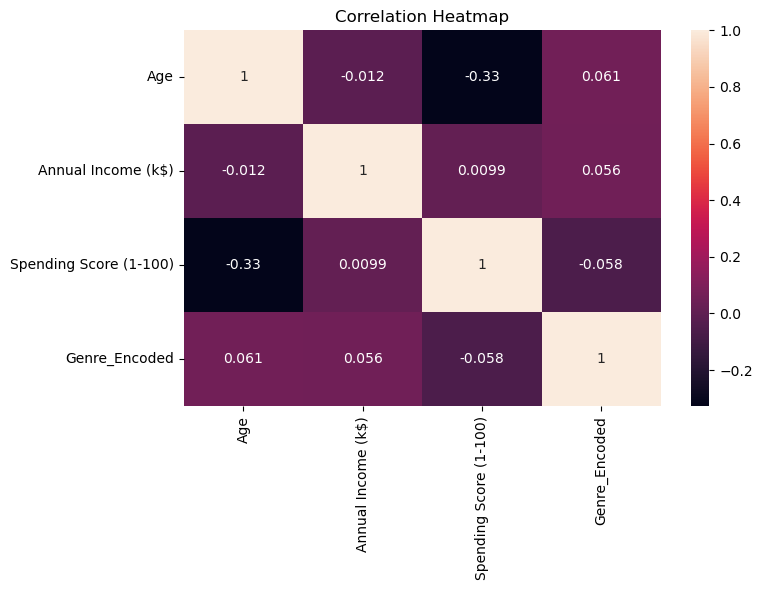

In [8]:
plot_corr(data)

# Clustering

  File "C:\Users\noman\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


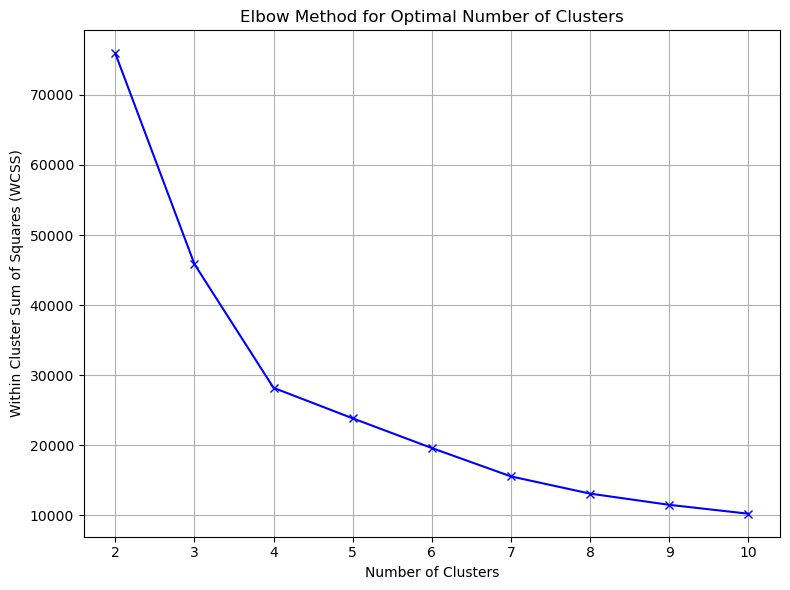

In [9]:
#Clustering
min_clusters = 2
max_clusters = 10
wcss = calculate_wcss(data[['Age', 'Spending Score (1-100)']], min_clusters, max_clusters)

#Elbow Method
plot_elbow_method(min_clusters, max_clusters, wcss)


In [10]:
#Silhouette Score:
calculate_silhouette_score(data)


For n_clusters = 2, the average silhouette score is: 0.4692341232501655
For n_clusters = 3, the average silhouette score is: 0.45300127016521263
For n_clusters = 4, the average silhouette score is: 0.49973941540141753
For n_clusters = 5, the average silhouette score is: 0.44526667994351227
For n_clusters = 6, the average silhouette score is: 0.44845919861907363
For n_clusters = 7, the average silhouette score is: 0.42313509747504796
For n_clusters = 8, the average silhouette score is: 0.4280182657184854
For n_clusters = 9, the average silhouette score is: 0.41447652571263843
For n_clusters = 10, the average silhouette score is: 0.40744304730373593
The best silhouette score is 0.49973941540141753 for n_clusters = 4


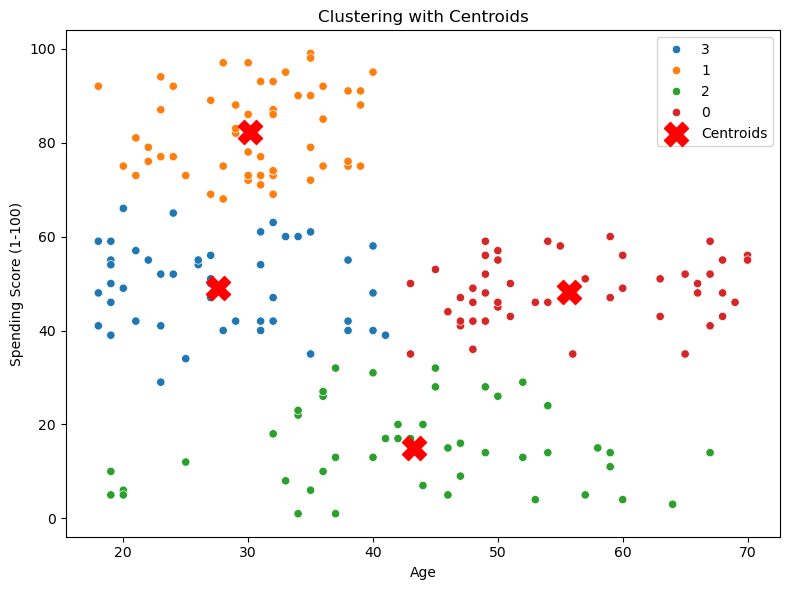

In [11]:
# KMeans Clustering for n = 4
n_clusters = 4
clustered_data, centroids = kmeans_clustering(data, n_clusters)
plot_clusters(clustered_data, centroids)




# Fitting

Dataset #2:
Co2 Emission of Zimbabwe

In [12]:
#Read dataset # 2
co2 = pd.read_csv('co2_emissions_kt_by_country.csv')
co2_zim = co2[co2["country_name"]=="Zimbabwe"]
co2_zim = co2_zim[["year","value"]]


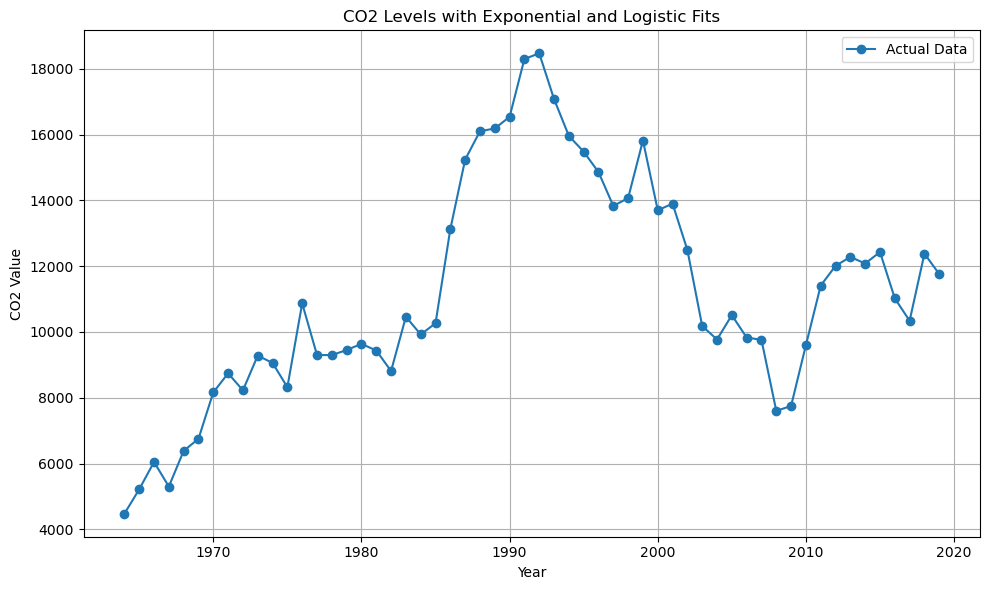

In [13]:
#plotting data
prefit_plot(co2_zim)

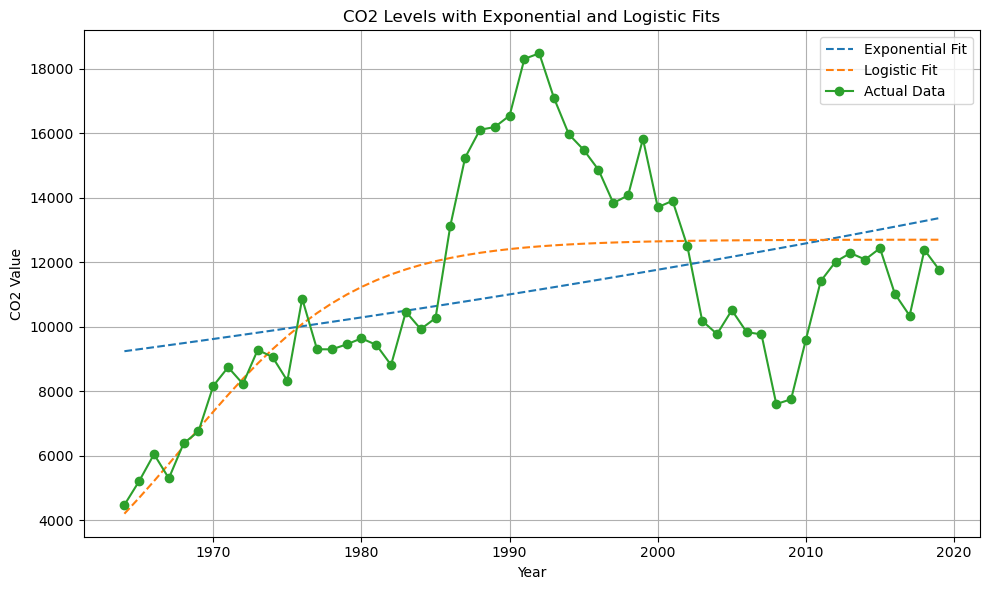

In [14]:
#performing logistic and exponential fits on data
fitting(co2_zim)

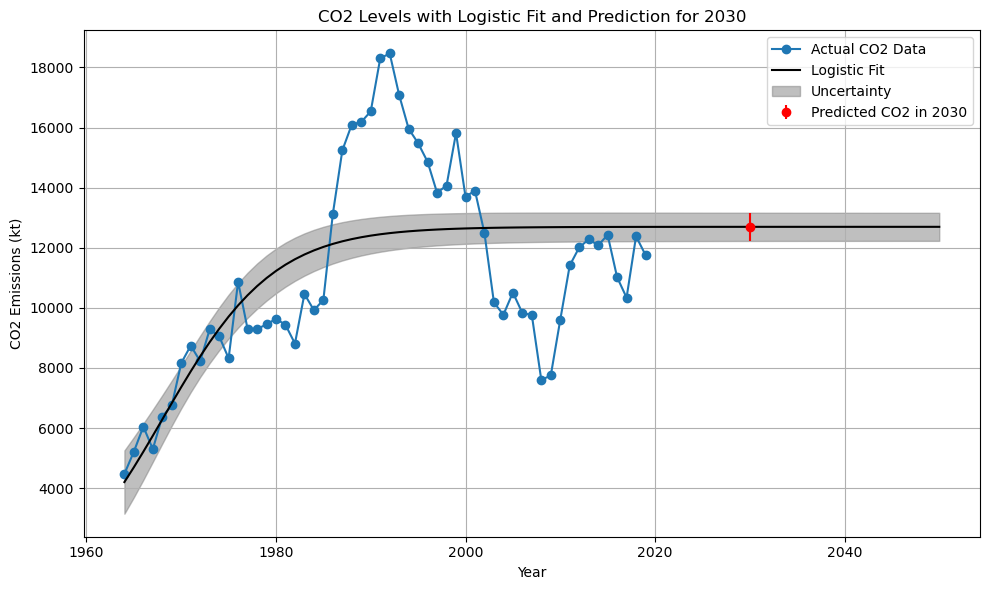

In [15]:
#predicting future co2 emissions
predict_and_plot_co2_2030(co2_zim)